In [36]:
from keras.datasets import imdb
import numpy as np
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [37]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [38]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [98]:
from keras import models, layers
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

In [99]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])

In [41]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [100]:
history = model.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 1s 68us/step - loss: 0.1543 - acc: 0.7881 - val_loss: 0.1076 - val_acc: 0.8660
Epoch 2/4
15000/15000 [==============================] - 1s 40us/step - loss: 0.0775 - acc: 0.9115 - val_loss: 0.0871 - val_acc: 0.8853
Epoch 3/4
15000/15000 [==============================] - 1s 40us/step - loss: 0.0534 - acc: 0.9368 - val_loss: 0.0819 - val_acc: 0.8874
Epoch 4/4
15000/15000 [==============================] - 1s 40us/step - loss: 0.0419 - acc: 0.9509 - val_loss: 0.0859 - val_acc: 0.8821


In [101]:
history_dict = history.history

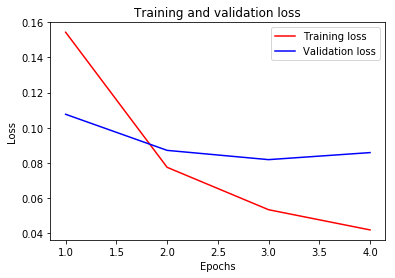

In [102]:
import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

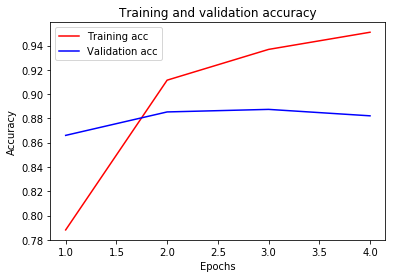

In [103]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [97]:
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 1s 53us/step


[0.11096095485687256, 0.84736]

In [44]:
model.predict(x_test)

array([[0.235546  ],
       [0.998878  ],
       [0.93860126],
       ...,
       [0.10338908],
       [0.13783151],
       [0.4155835 ]], dtype=float32)